# Loan predictions

We are going to review the project from the original learning lab, Automation of the loan eligibility process. It consists of original instructions and provided solutions. Run the code in your Jupyter and remember what we are doing in each step.

### Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [4]:
df[df.columns[1:]].describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [5]:
for col in df.select_dtypes(include='object').columns[1:]:
    print(df[col].value_counts())
    print('')

Male      489
Female    112
Name: Gender, dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

No     500
Yes     82
Name: Self_Employed, dtype: int64

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Y    422
N    192
Name: Loan_Status, dtype: int64



### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



In [6]:
def plot_histogram(df,col,bins=20):
    fig,ax = plt.subplots(figsize=(12,8))
    ax.hist(df[col].dropna(), bins=bins)
    ax.set_title(col)
    ax.set_ylabel('frequency')
    ax.set_xlabel(col)
    plt.show()

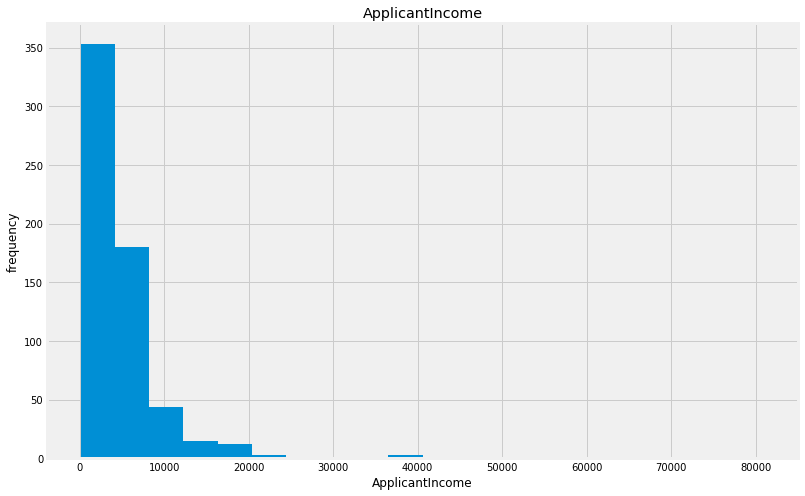

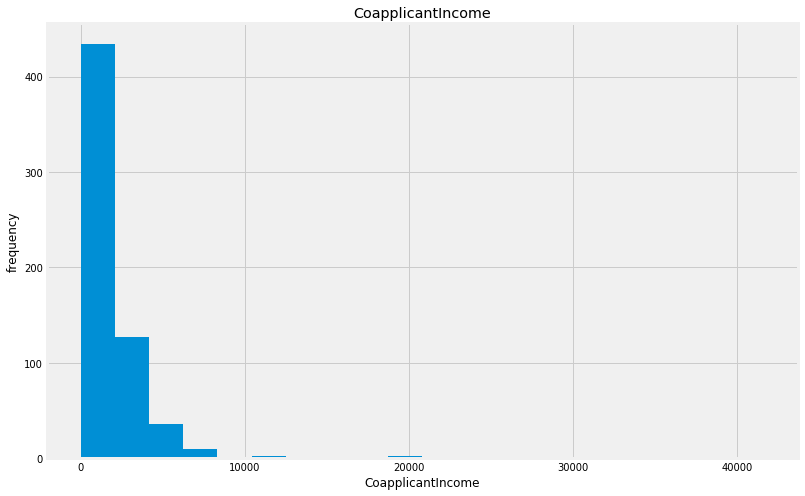

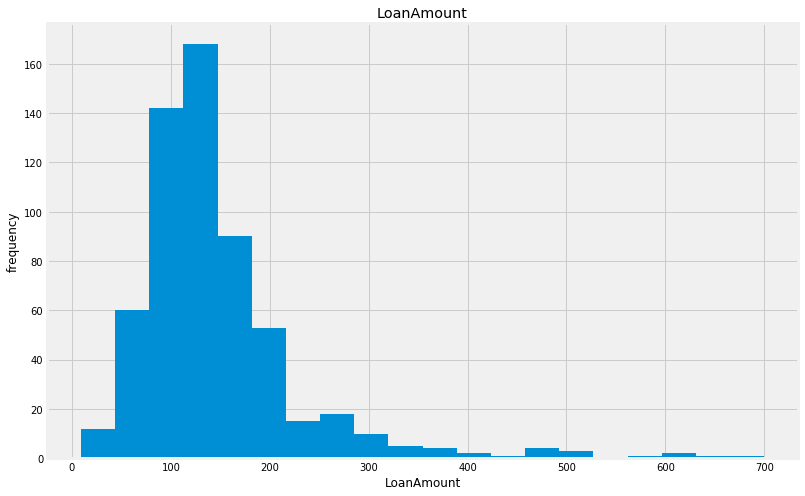

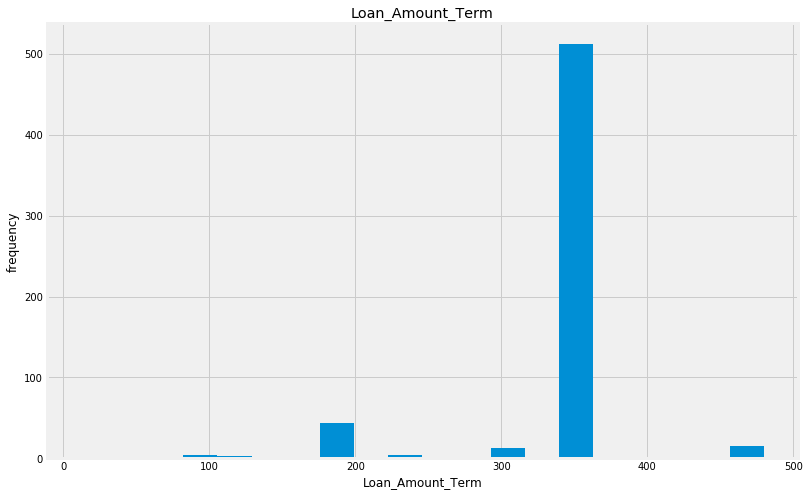

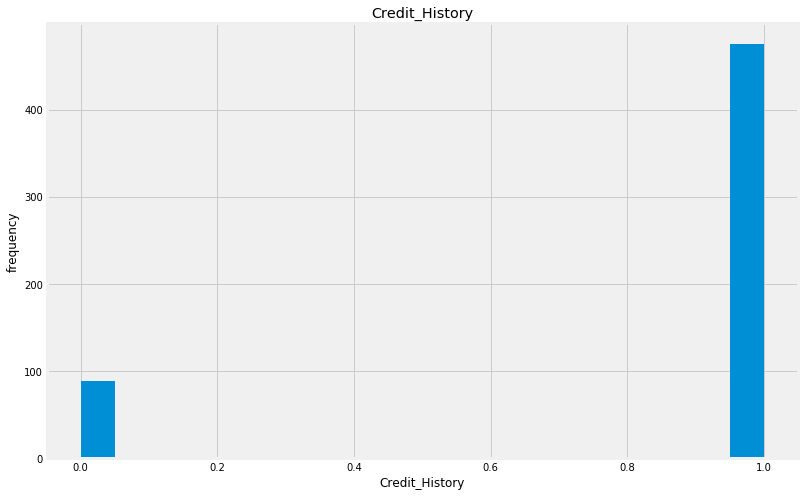

In [7]:
bins = 20
for col in df.select_dtypes(include='number'):
    plot_histogram(df,col,bins=bins)


Look at box plots to understand the distributions. 

In [8]:
def plot_box_plot(df,col):
    fig,ax = plt.subplots(figsize=(12,8))
    ax.boxplot(df[col].dropna())
    ax.set_title(col)
    ax.set_ylabel('value')
    ax.set_xlabel(col)
    plt.show()

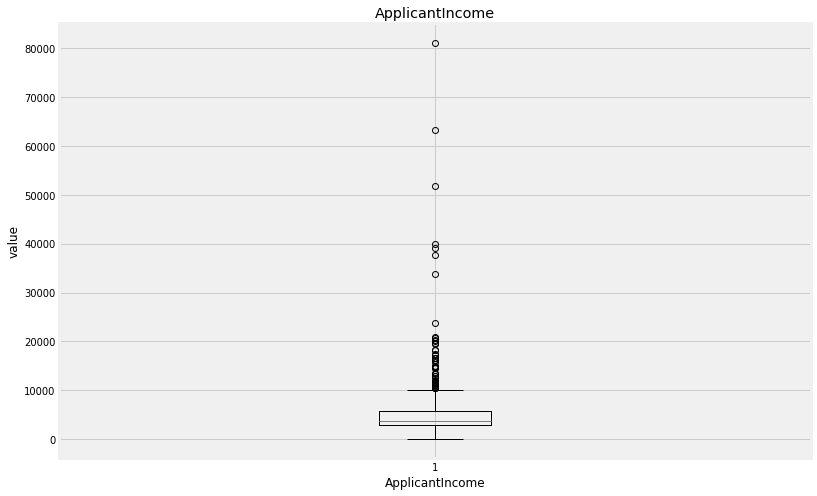

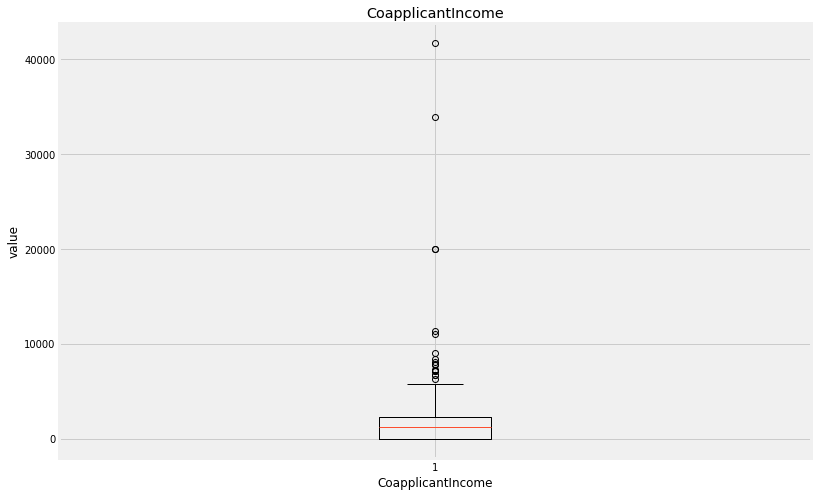

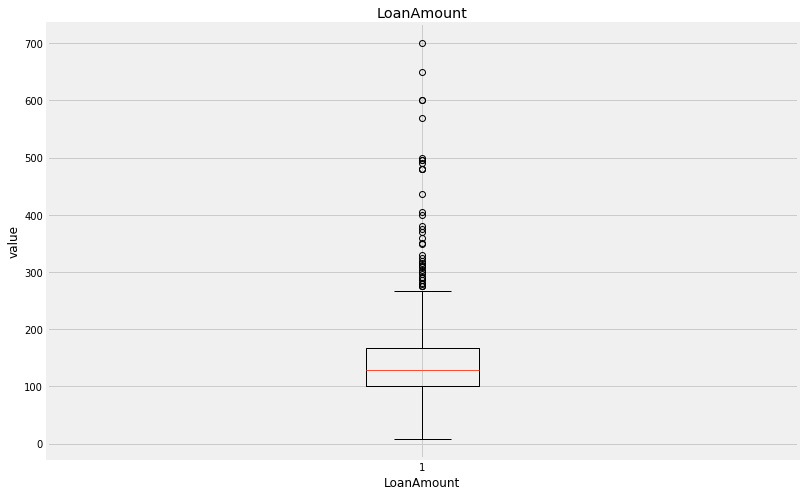

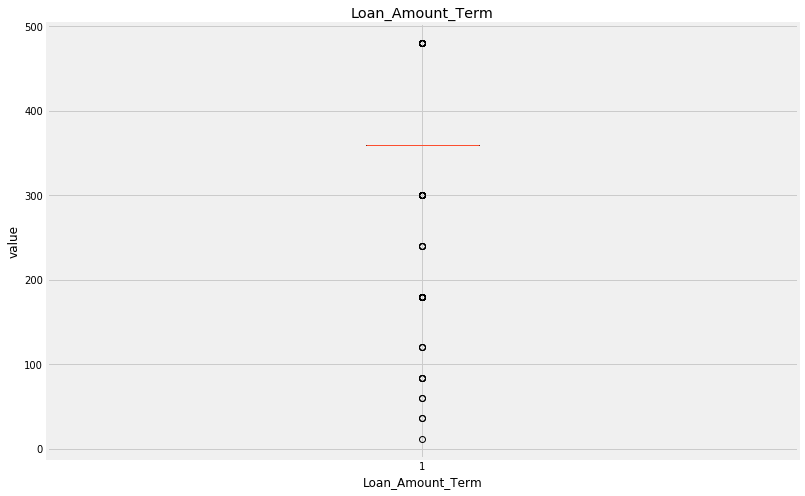

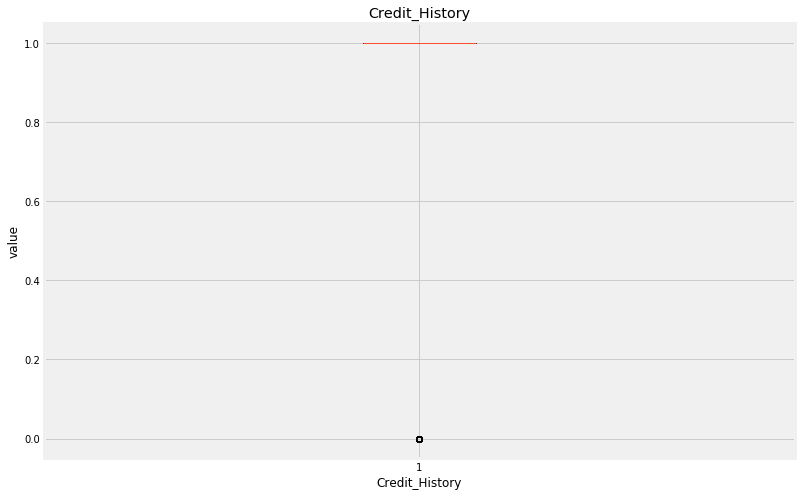

In [9]:
for col in df.select_dtypes(include='number'):
    plot_box_plot(df,col)

Look at the distribution of income segregated  by `Education`

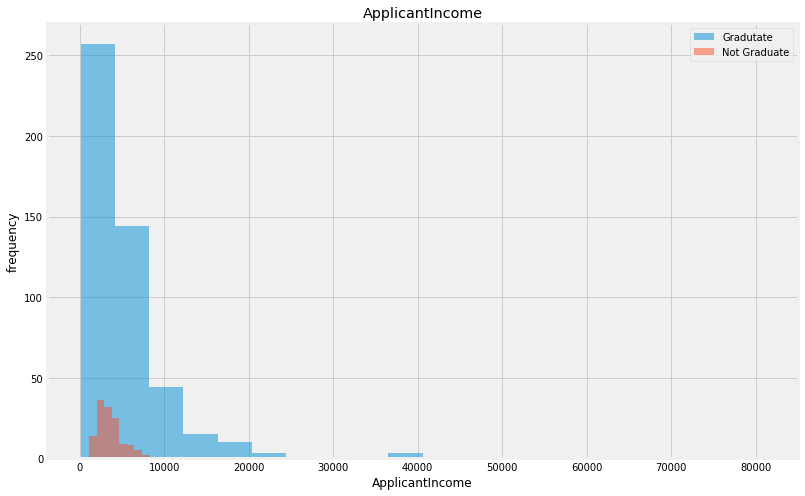

In [10]:
fig,ax = plt.subplots(figsize=(12,8))
ax.hist(df.loc[df['Education'] == 'Graduate','ApplicantIncome'].dropna(), 
        bins=bins, label = 'Gradutate', alpha=0.5)
ax.hist(df.loc[df['Education'] == 'Not Graduate','ApplicantIncome'].dropna(), 
        bins=bins, label= 'Not Graduate', alpha=0.5)
ax.set_title('ApplicantIncome')
ax.set_ylabel('frequency')
ax.set_xlabel('ApplicantIncome')
ax.legend()
plt.show()

Look at the histogram and boxplot of LoanAmount

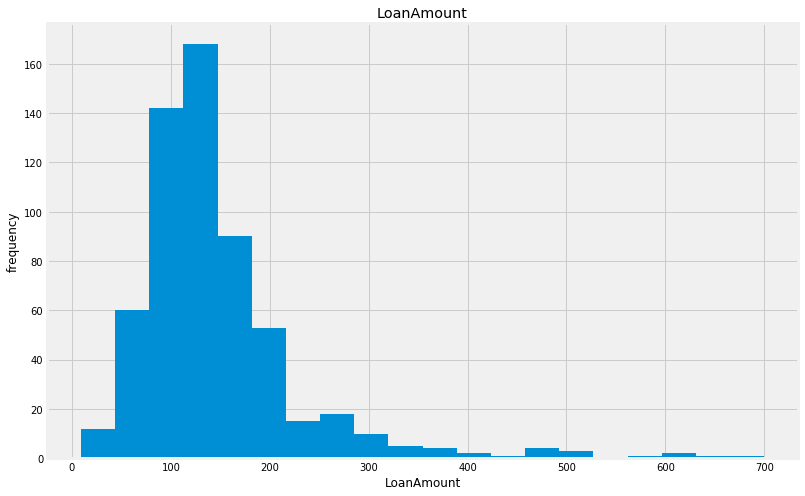

In [11]:
plot_histogram(df,'LoanAmount', 20)

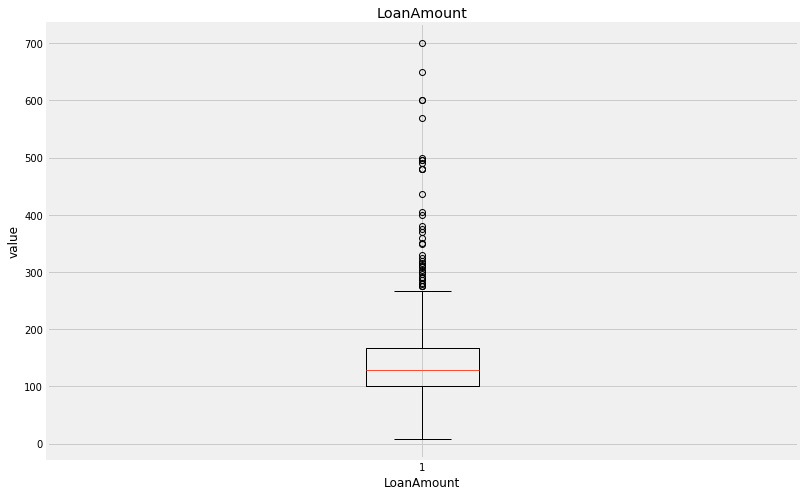

In [12]:
plot_box_plot(df,'LoanAmount')

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [13]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
df.pivot_table(values='ApplicantIncome', 
               index=['Gender', 'Married'], 
               aggfunc=np.mean, 
               fill_value=0)

ApplicantIncome
Gender Married                 
Female No           4503.787500
       Yes          4829.645161
Male   No           5236.146154
       Yes          5529.540616

In [15]:
df.pivot_table(values='LoanAmount', 
               index=['Gender', 'Married'], 
               aggfunc=np.mean, 
               fill_value=0)

LoanAmount
Gender Married            
Female No       116.115385
       Yes      153.322581
Male   No       136.088000
       Yes      154.011662

In [16]:
df.pivot_table(values='Loan_Amount_Term', 
               index=['Gender', 'Married'], 
               aggfunc=np.mean, 
               fill_value=0)

Loan_Amount_Term
Gender Married                  
Female No             355.012987
       Yes            349.161290
Male   No             348.562500
       Yes            335.931034

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [17]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna('No', inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna('No', inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].min(), inplace=True)
df['Credit_History'].fillna(0, inplace=True)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

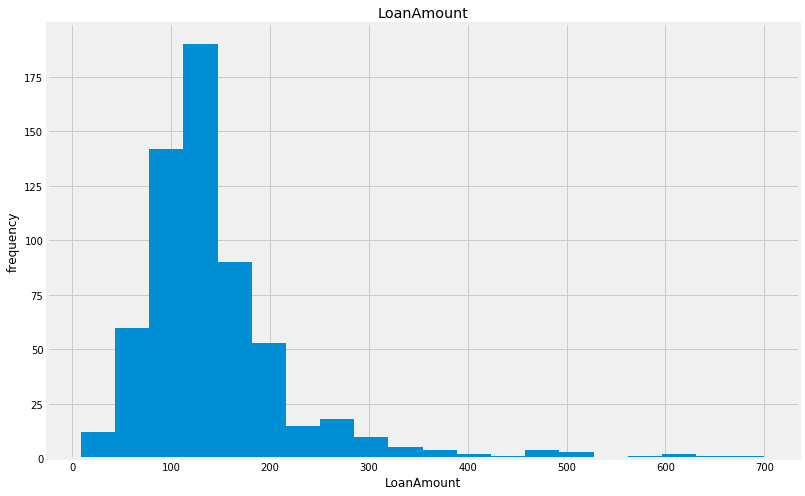

In [19]:
plot_histogram(df,'LoanAmount', 20)

In [20]:
df['LoanAmount'] = np.log(df['LoanAmount'])

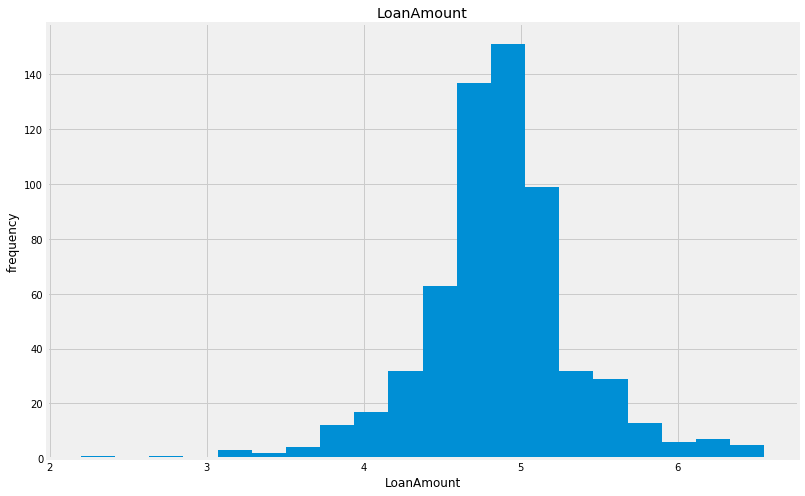

In [21]:
plot_histogram(df,'LoanAmount', 20)

Combine both incomes as total income and take a log transformation of the same.

In [22]:
df['total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

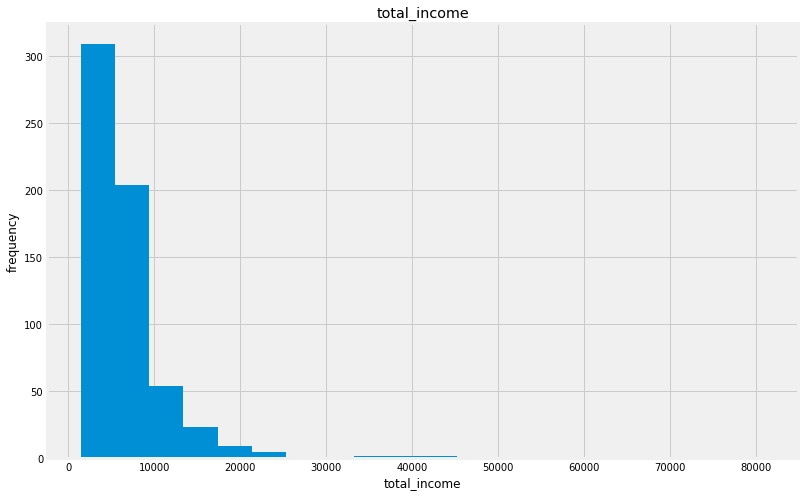

In [23]:
plot_histogram(df,'total_income', 20)

In [24]:
df['total_income'] = np.log(df['total_income'])

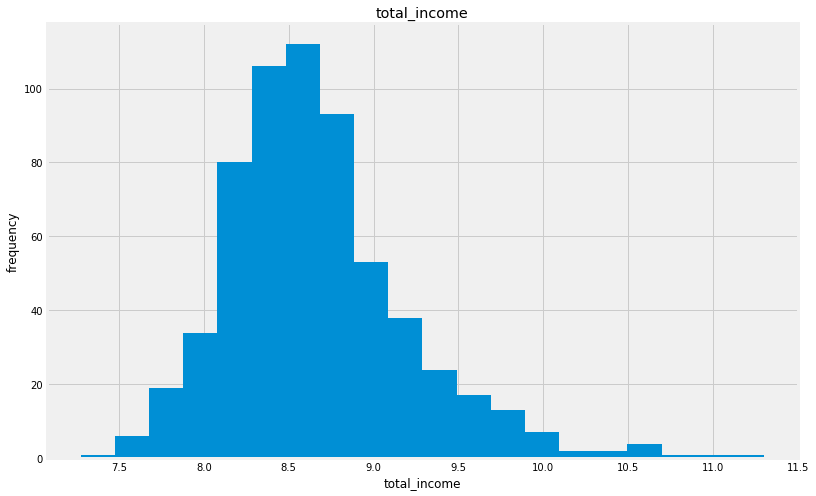

In [25]:
plot_histogram(df,'total_income',20)

## 4. Building a Predictive Model

In [37]:
# import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [27]:
# replace values in Loan_status
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1, 'N':0})

In [28]:
# create X, y
y = df.pop('Loan_Status')
X = df.drop('Loan_ID',axis=1)

In [29]:
# create dummy variables
X = pd.get_dummies(X)

In [30]:
# scaling
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [31]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
# classification model
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
# prediction on a test set
y_pred = rf.predict(X_test)

In [35]:
# accuracy
precision_score(y_test,y_pred)

0.7482517482517482

Try paramater grid search to improve the results

In [38]:
# GS parameters
parameters = {'n_estimators': [10,100,1000], 
              'max_depth': [2, 5, None],
             'min_samples_split': [2,10,30]}

# model
rf = RandomForestClassifier()

# create gird search
clf = GridSearchCV(rf, parameters, cv=5, n_jobs=-1, verbose=10,scoring='precision')

# fit grid search
clf.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   38.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [39]:
# GS best params
clf.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 1000}

In [40]:
# GS best score
clf.best_score_

0.7890069718697885

In [41]:
# precision score on a test set
precision_score(y_test,clf.predict(X_test))

0.7290322580645161

## Conclusion

We have seen the solution of the initial project. Now, we can move onto the new project, **deployment** of this solution in the cloud.